ЛАБОРАТОРНАЯ РАБОТА ПО ОБРАБОТКЕ ИЗОБРАЖЕНИЙ #3
 
1. Для изображения sar_3.jpg найти наиболее протяженный участок
------------------------------------------------------------
Изображение sar_3.jpg успешно загружено


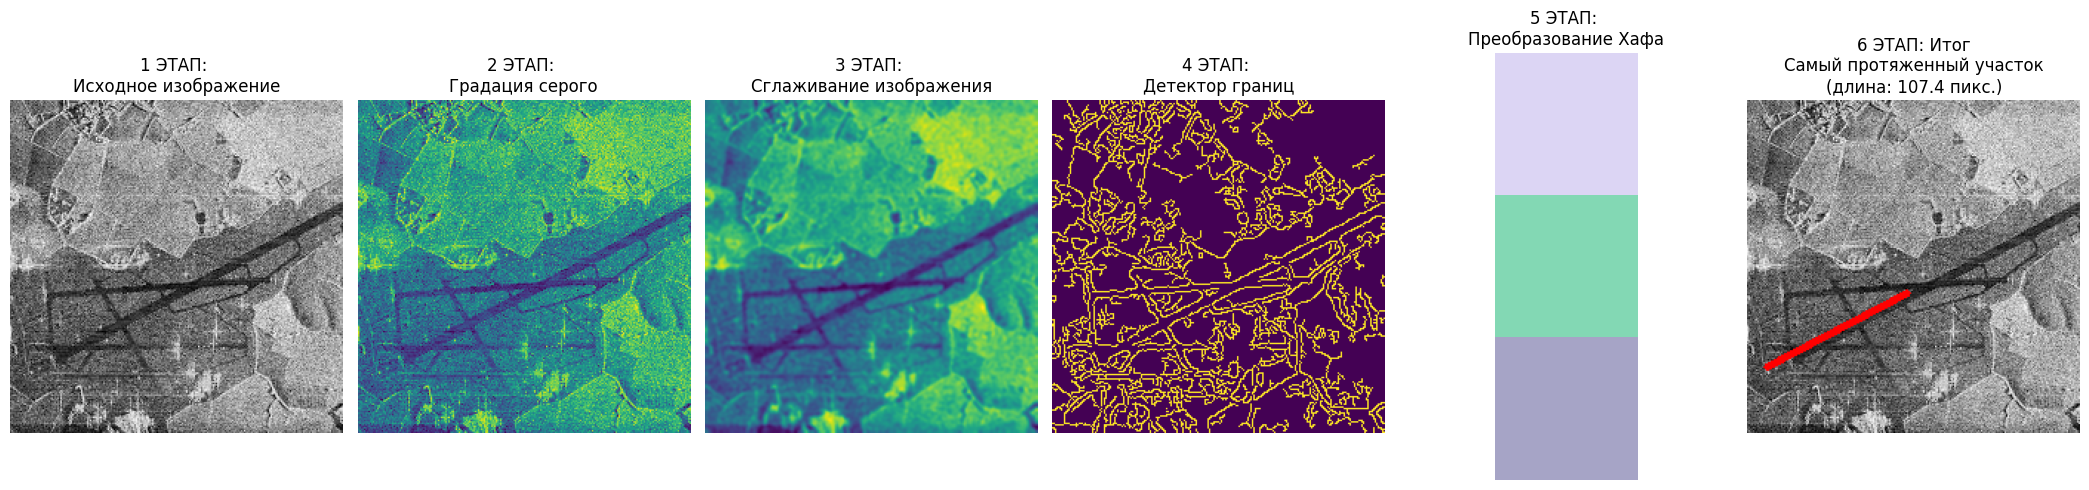

Наиболее протяженный участок:
- Длина: 107.35 пикселей
- Координаты: (13, 180) -> (108, 130)
- Угол наклона: -27.8°
- Всего линий найдено: 3
 
 
1. Для изображения sar_3.jpg провести исследование алгоритмов бинаризации, выделить участок дорожной полосы.
------------------------------------------------------------


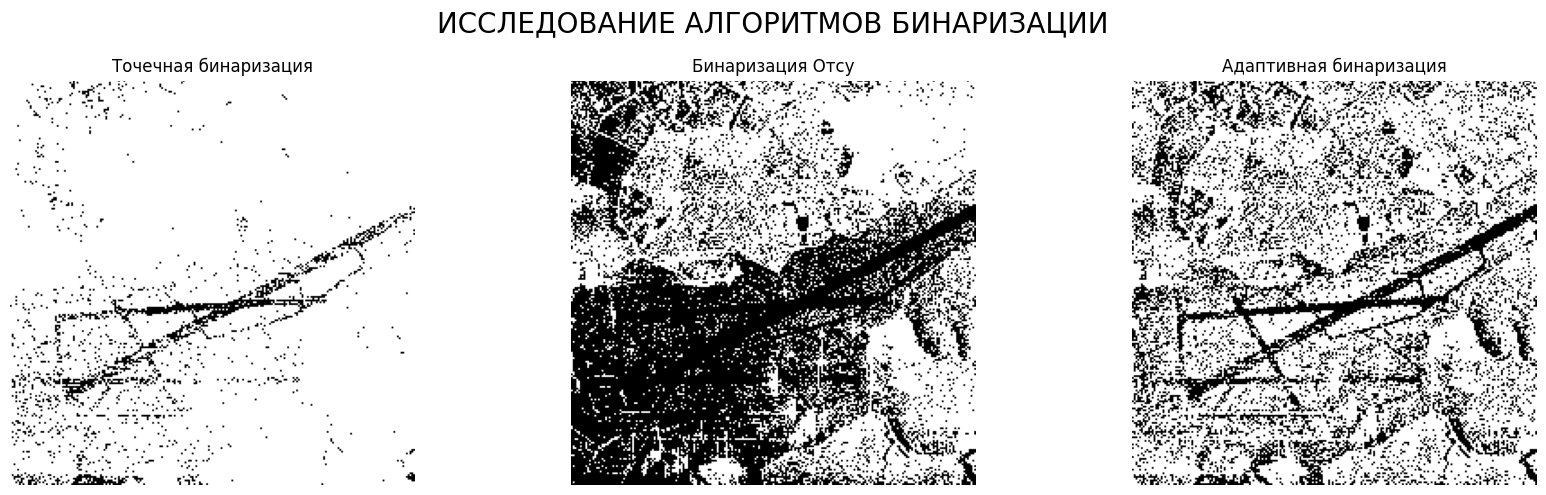

In [3]:
import numpy as np
import cv2
import copy
import matplotlib.pyplot as plt

print("="*50)
print("ЛАБОРАТОРНАЯ РАБОТА ПО ОБРАБОТКЕ ИЗОБРАЖЕНИЙ #3")
print("="*50)
print(" ")

###1 ЗАДАНИЕ : Для изображения sar_3.jpg найти наиболее протяженный участок
print("1. Для изображения sar_3.jpg найти наиболее протяженный участок")
print("-"*60)

image = cv2.imread('sar_3.jpg')
if image is None:
    print("Изображение не найдено")
else:
    print("Изображение sar_3.jpg успешно загружено")

# Преобразуем в градации серого
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5,5), 0)# Сглаживание изображения. Шумоподавление дл выделения границ
canny = cv2.Canny(blur, 50, 150, apertureSize=3)

# Преобразование Хафа
lines = cv2.HoughLinesP(canny, 1, np.pi/180, threshold=100, minLineLength=50, maxLineGap=10)#Используем эту формулу, так как другая для полярных координат
max_length = 0          # для макс длины
longest_line = None     # для самой длинной линии

if lines is not None:                           # Проверяем, найдены ли линии
    for line in lines:                          # Перебираем все найденные линии
        x1, y1, x2, y2 = line[0]               # Извлекаем координаты концов линии
        length = np.sqrt((x2-x1)**2 + (y2-y1)**2)  # Вычисляем длину по формуле расстояния
        if length > max_length:
            max_length = length
            longest_line = line                 # Сохраняем эту линию как самую длинную

# Создаем результат с самой длинной линией
result = image.copy()
if longest_line is not None:
    x1, y1, x2, y2 = longest_line[0]
    cv2.line(result, (x1, y1), (x2, y2), (0, 0, 255), 4)

plt.figure(figsize=(21, 5))

plt.subplot(1, 6, 1)
plt.imshow(image)
plt.title('1 ЭТАП: \nИсходное изображение')
plt.axis('off')

plt.subplot(1, 6, 2)
plt.imshow(gray)
plt.title('2 ЭТАП: \nГрадация серого')
plt.axis('off')

plt.subplot(1, 6, 3)
plt.imshow(blur)
plt.title('3 ЭТАП: \nСглаживание изображения')
plt.axis('off')

plt.subplot(1, 6, 4)
plt.imshow(canny)
plt.title('4 ЭТАП: \nДетектор границ')
plt.axis('off')

plt.subplot(1, 6, 5)
plt.imshow(lines)
plt.title('5 ЭТАП: \nПреобразование Хафа')
plt.axis('off')

# Результат с самой длинной линией
plt.subplot(1, 6, 6)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title(f'6 ЭТАП: Итог\nСамый протяженный участок\n(длина: {max_length:.1f} пикс.)')
plt.axis('off')

plt.tight_layout()
plt.show()

if longest_line is not None:
    x1, y1, x2, y2 = longest_line[0]
    angle = np.degrees(np.arctan2(y2-y1, x2-x1))
    print(f"Наиболее протяженный участок:")
    print(f"- Длина: {max_length:.2f} пикселей")
    print(f"- Координаты: ({x1}, {y1}) -> ({x2}, {y2})")
    print(f"- Угол наклона: {angle:.1f}°")
    print(f"- Всего линий найдено: {len(lines)}")
else:
    print("Линии не найдены")
print(" ")
print(" ")



###1 ЗАДАНИЕ : Для изображения sar_3.jpg провести исследование алгоритмов бинаризации, выделить участок дорожной полосы.
print("1. Для изображения sar_3.jpg провести исследование алгоритмов бинаризации, выделить участок дорожной полосы.")
print("-"*60)
#Точечная бинаризация
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
bin_img = copy.deepcopy(image_gray)
T  = 50
bin_img[image_gray < T] = 0
bin_img[image_gray >= T] = 255

#Бинаризация Отсу
_,th2 = cv2.threshold(image_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

#Адаптивная бинаризация
th3 = cv2.adaptiveThreshold(image_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,71,21)

plt.figure(figsize=(17, 5))

plt.subplot(1, 3, 1)
plt.imshow(bin_img, cmap="gray")
plt.title('Точечная бинаризация')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(th2, cmap="gray")
plt.title('Бинаризация Отсу')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(th3, cmap="gray")
plt.title('Адаптивная бинаризация')
plt.axis('off')

plt.suptitle("ИССЛЕДОВАНИЕ АЛГОРИТМОВ БИНАРИЗАЦИИ", fontsize=20)
plt.tight_layout()
plt.show()